<a href="https://colab.research.google.com/github/aarushi-shanker/pokemon-classification/blob/main/Pokemon_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
!unzip PokemonDataset.zip -d "images/"

Archive:  PokemonDataset.zip
mapname:  conversion of  failed
   creating: images/Test/
   creating: images/Train/
   creating: images/Test/Pikachu/
   creating: images/Train/Pikachu/
   creating: images/Test/Bulbasaur/
   creating: images/Train/Bulbasaur/
   creating: images/Test/Charmander/
   creating: images/Train/Charmander/
 extracting: images/Train/Pikachu/345.jpg  
 extracting: images/Train/Pikachu/335.jpg  
 extracting: images/Train/Pikachu/299.jpg  
 extracting: images/Train/Pikachu/396.jpg  
 extracting: images/Train/Pikachu/350.jpg  
 extracting: images/Train/Pikachu/308.jpg  
 extracting: images/Train/Pikachu/346.jpg  
 extracting: images/Train/Pikachu/355.jpg  
 extracting: images/Train/Pikachu/353.jpg  
 extracting: images/Train/Pikachu/390.jpg  
 extracting: images/Train/Pikachu/319.jpg  
 extracting: images/Train/Pikachu/386.jpg  
 extracting: images/Train/Pikachu/327.jpg  
 extracting: images/Train/Pikachu/314.jpg  
 extracting: images/Train/Pikachu/303.jpg  
 extracti

In [15]:
classes= os.listdir("images/Train")
classes

['Charmander', 'Pikachu', 'Bulbasaur']

In [19]:
print("Training Data:")
for f in classes:
  path= "images/Train/" + f
  print(f"{f} - {len(os.listdir(path))}")

Training Data:
Charmander - 102
Pikachu - 101
Bulbasaur - 101


In [5]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00


In [6]:
from keras_preprocessing import image

In [16]:
train_data = [] #x
train_labels = [] #y
for category in classes:
  folder = f"images/Train/{category}"
  for img_name in os.listdir(folder):
      img_path = f"{folder}/{img_name}"

      img=image.load_img(path, target_size=(100,100))
      img= image.img_to_array(img)
      train_data.append(img)
      train_labels.append(category)

In [13]:
path = "images/Train/Pikachu/300.jpg"
img=image.load_img(path, target_size=(100,100))
img= image.img_to_array(img)
#img.shape
train_data.append(img)

In [20]:
train_data= np.array(train_data)
train_labels= np.array(train_labels)

In [100]:
train_data.shape

(304, 30000)

In [121]:
train_data = train_data.reshape(len(train_data), 30000)
train_data.shape

(304, 30000)

In [123]:
train_labels

array(['[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]',
       '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]',
       '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]',
       '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]',
       '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]',
       '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]',
       '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]',
       '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]',
       '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]',
       '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]',
       '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]',
       '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]',
       '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]',
       '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]',
       '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]',
       '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.

In [124]:
category2label={'Pikachu':0, 'Charmander':1, 'Bulbasaur':2}
label2category={0:'Pikachu', 1: 'Charmander', 2: 'Bulbasaur'}

In [ ]:
train_labels = np.array([ category2label[label] for label in train_labels])

In [127]:
from keras.utils import to_categorical

In [ ]:
train_labels=to_categorical(train_labels)

In [109]:
train_labels[:5]

array(['[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]',
       '[0.0, 1.0, 0.0]', '[0.0, 1.0, 0.0]'], dtype='<U15')

In [31]:
from keras.layers import Dense
from keras import Sequential

In [110]:
features=train_data.shape[1]

In [111]:
model= Sequential()
model.add( Dense(units=512, activation='relu', input_shape=(features,)))
model.add( Dense(units=256, activation='relu'))
model.add( Dense(units=128, activation='relu'))
model.add( Dense(units=64, activation='relu'))
model.add( Dense(units=3, activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [112]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               15360512  
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 15533187 (59.25 MB)
Trainable params: 15533187 (59.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(train_data, train_labels, batch_size=32, epochs=50)

In [46]:
test_data = [] #x
test_labels = [] #y
for category in classes:
  folder = f"images/Test/{category}"
  for img_name in os.listdir(folder):
      img_path = f"{folder}/{img_name}"

      img=image.load_img(img_path, target_size=(100,100))
      img= image.img_to_array(img)
      test_data.append(img)
      test_labels.append(category)

In [95]:
test_data= np.array(test_data)
test_labels= np.array(test_labels)

In [40]:
test_data.shape

(123, 100, 100, 3)

In [44]:
# test_labels

In [47]:
test_labels

['Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu',
 'Pikachu'

In [48]:
test_labels = np.array( [category2label[label] for label in test_labels])
test_labels = to_categorical(test_labels)
test_labels.shape

(123, 3)

In [51]:
test_data = test_data.reshape(len(test_data), 30000)
test_data.shape

(123, 30000)

In [52]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 27ms/step - loss: 8.1020 - accuracy: 0.2764


[8.101984024047852, 0.27642276883125305]

In [54]:
pred=model.predict(test_data).argmax(axis=1)

4/4 [==============================] - 0s 26ms/step


In [55]:
[label2category[p] for p in pred]

['Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Pikachu',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Pikachu',
 'Bulbasaur',
 'Bulbasaur',
 'Pikachu',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Pikachu',
 'Pikachu',
 'Bulbasaur',
 'Bulbasaur',
 'Pikachu',
 'Bulbasaur',
 'Pikachu',
 'Pikachu',
 'Bulbasaur',
 'Pikachu',
 'Bulbasaur',
 'Pikachu',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Pikachu',
 'Charmander',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Pikachu',
 'Pikachu',
 'Bulbasaur',
 'Bulbasaur',
 'Charmander',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Pikachu',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bu

In [88]:
test_img="images/Test/Bulbasaur/1104.jpg"
img = image.load_img(test_img, target_size=(100,100))
img = image.img_to_array( img )

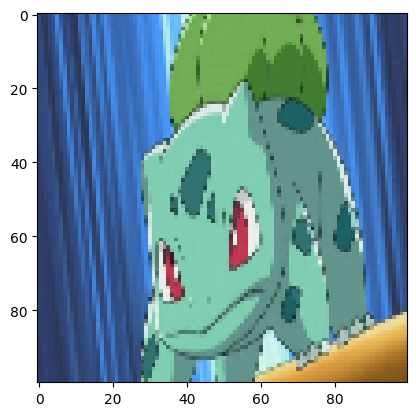

In [89]:
plt.imshow(img.astype('int'));

In [90]:
img = img.reshape(1,30000)
img.shape

(1, 30000)

In [133]:
pred=label2category[model.predict(img).argmax()]
pred

1/1 [==============================] - 0s 87ms/step


'Bulbasaur'